<a href="https://colab.research.google.com/github/2147118Joshua/Machine_Learning/blob/main/Logistic_Regression_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import *

In [ ]:
df = pd.read_csv("/content/car_details.csv")
#prints first 10 file in csv
df.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
df.isnull().any().any()

False

In [ ]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(4340, 8)
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [ ]:
df.replace(to_replace=np.nan,value=0000)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Let's drop unimportant columns
df.drop('name', inplace=True, axis=1)

In [ ]:
print(df)

      year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
4335  2014         409999      80000  Diesel  Individual       Manual   
4336  2014         409999      80000  Diesel  Individual       Manual   
4337  2009         110000      83000  Petrol  Individual       Manual   
4338  2016         865000      90000  Diesel  Individual       Manual   
4339  2016         225000      40000  Petrol  Individual       Manual   

             owner  
0      First Owner  
1      First Owner  
2      First Owner  
3      First Owner  
4     Second Owner

In [ ]:
owners=df['owner'].unique()
transmission = df['transmission'].unique()
seller_type = df['seller_type'].unique()
fuel = df['fuel'].unique()
print(owners,transmission,seller_type)

[0 1 2 3 4] [0 1] [0 1 2]


In [ ]:
seller_type

array([0, 1, 2])

In [ ]:
t = {owners[0]: 0, owners[1]: 1, owners[2]: 2, owners[3]: 3, owners[4]: 4}
df['owner'] = df['owner'].map(t)

t = {transmission[0] : 0, transmission[1] : 1}
df['transmission'] = df['transmission'].map(t)

t = {seller_type[0] : 0, seller_type[1] : 1, seller_type[2] : 2}
df['seller_type'] = df['seller_type'].map(t)

t = {fuel[0] : 0, fuel[1] : 1, fuel[2] : 2, fuel[3] : 3, fuel[4] : 4}
df['fuel'] = df['fuel'].map(t)

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


<Figure size 432x288 with 0 Axes>

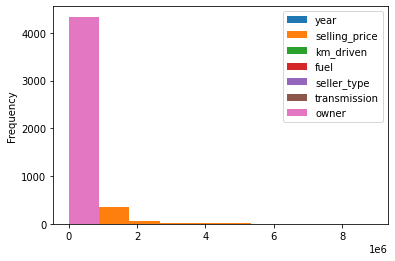

In [ ]:
plt.figure()
df.plot(kind='hist')

In [ ]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
features = ['transmission', 'owner']

x = df[features]
y = df['seller_type']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(4340, 2) (3472, 2) (868, 2)


Logistic Regression

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


Confusion matrix

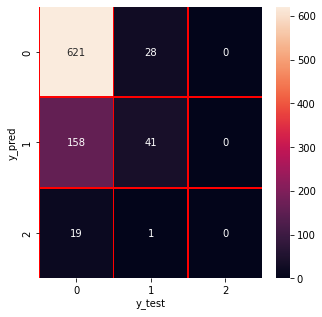

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       649
           1       0.59      0.21      0.30       199
           2       0.00      0.00      0.00        20

    accuracy                           0.76       868
   macro avg       0.45      0.39      0.39       868
weighted avg       0.72      0.76      0.71       868



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
